In [1]:
import numpy as np
import pandas as pd

Loading the dataset

Since the data is not in utf8 encoding so checking for the type of encoding using chardet

In [2]:
import chardet

In [3]:
with open('spam.csv', 'rb') as file:
    result = chardet.detect(file.read())
    encoding = result['encoding']

In [4]:
data=pd.read_csv('spam.csv',encoding=encoding)

Knowing about the data

In [5]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
data.shape

(5572, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Data Cleaning

Drop last 3 columns as they do not have any significance

In [8]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

Checking for missing values

In [9]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

There are no missing values in the data

Checking for duplicate rows

In [10]:
data.duplicated().sum()

np.int64(403)

Since there are duplicate values so droping them

In [11]:
data=data.drop_duplicates(keep='first')

In [12]:
data.duplicated().sum()

np.int64(0)

Now there are no duplicate values

Checking the shape after removing duplicates

In [13]:
data.shape

(5169, 2)

Renaming the first and second column to output and text

In [14]:
data.rename(columns={'v1':'output','v2':'text'},inplace=True)

In [15]:
data.head()

,output,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In output column converting ham to 0 and spam to 1 using LabelEncoder

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()

In [18]:
data['output']=le.fit_transform(data['output'])

EDA

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

Checking for the number of spam and not spam data

In [20]:
data['output'].value_counts()

output
0    4516
1     653
Name: count, dtype: int64

<Axes: xlabel='output'>

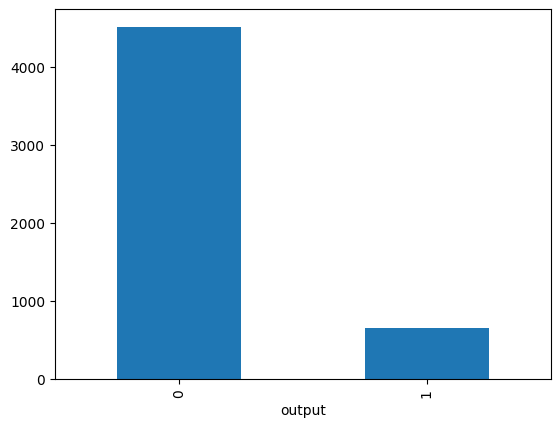

In [21]:
data['output'].value_counts().plot(kind='bar')

Data is imbalanced

Making 3 new columns named char, words, sentences containing number of chars in sms , words in sms and sentences in sms

In [22]:
import nltk

In [23]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Making new column char containing number of characters in the text using len function

In [24]:
data['char']=data['text'].apply(len)

Making new column word containing number of words in the text using nltk word tokenizer

In [25]:
data['word']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

Making new column sen containing number of sentence in the text using nltk sentence tokenizer

In [26]:
data['sen']=data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

Seeing the analysis of new columns created

In [27]:
data.head()

,output,text,char,word,sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
data.describe()

,output,char,word,sen
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


Seeing the description for spam and not spam separately

For not spam sms

In [29]:
data[data['output']==0][['char','word','sen']].describe()

,char,word,sen
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


For spam sms

In [30]:
data[data['output']==1][['char','word','sen']].describe()

,char,word,sen
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


It can be clearly seen that the mean for both spam and not spam are different
The spam messages are somewhat bigger as compared to not spam messages

Analytically seeing the distribution of character for both spam and not spam case

<Axes: xlabel='char', ylabel='Count'>

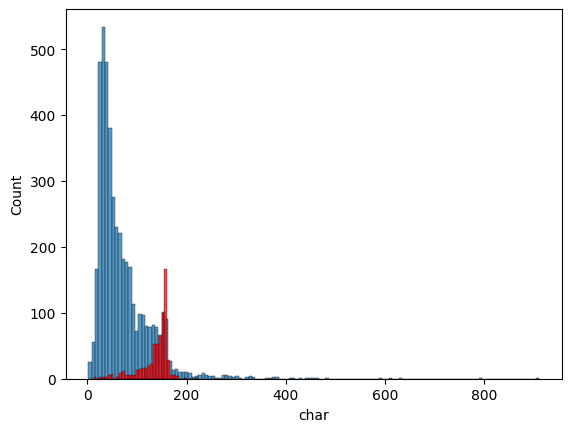

In [31]:
sns.histplot(data[data['output']==0]['char'])
sns.histplot(data[data['output']==1]['char'],color='red')

It can be clearly seen that spam messages hav more count of character as not spam messsages

Analytically seeing the distribution of words for both spam and not spam case

<Axes: xlabel='word', ylabel='Count'>

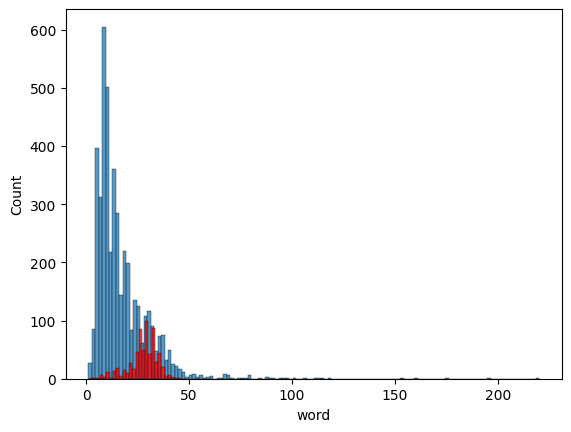

In [32]:
sns.histplot(data[data['output']==0]['word'])
sns.histplot(data[data['output']==1]['word'],color='red')

It can be clearly seen that spam messages hav more count of words as not spam messsages

Analytically seeing the distribution of sentences for both spam and not spam case

<Axes: xlabel='sen', ylabel='Count'>

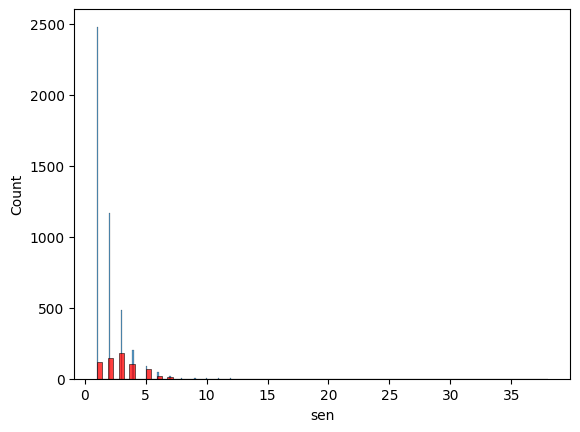

In [33]:
sns.histplot(data[data['output']==0]['sen'])
sns.histplot(data[data['output']==1]['sen'],color='red')

It can be clearly seen that spam messages hav more count of sentences as not spam messsages

To see the correlation of newly created columns based on output column

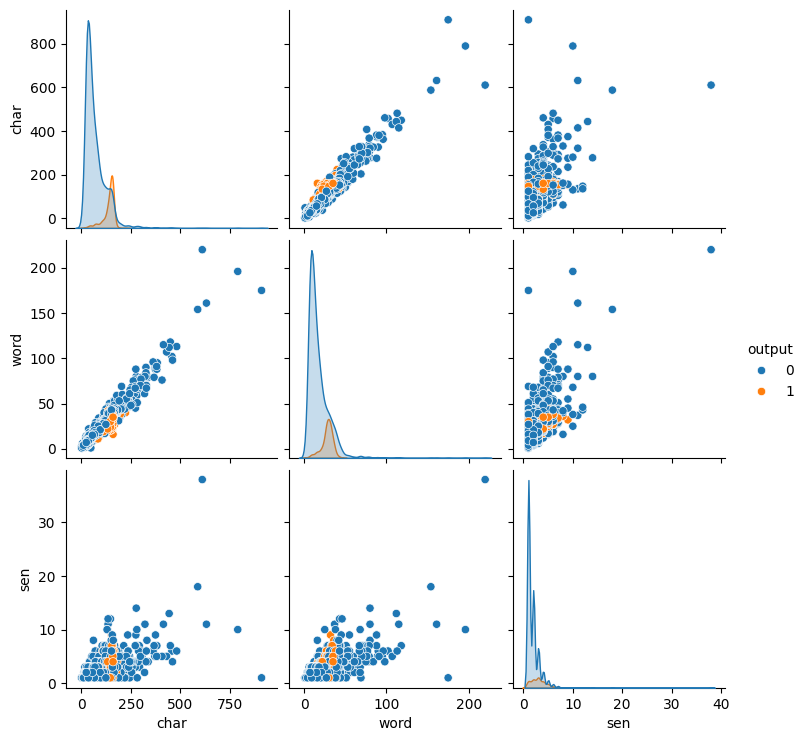

In [34]:
sns.pairplot(data,hue='output')

Seeing the correlation of columns

In [35]:
num=data.select_dtypes(include=['number'])
num.corr()

,output,char,word,sen
output,1.000000,0.384717,0.262912,0.263939
char,0.384717,1.000000,0.965760,0.624139
word,0.262912,0.965760,1.000000,0.679971
sen,0.263939,0.624139,0.679971,1.000000


<Axes: >

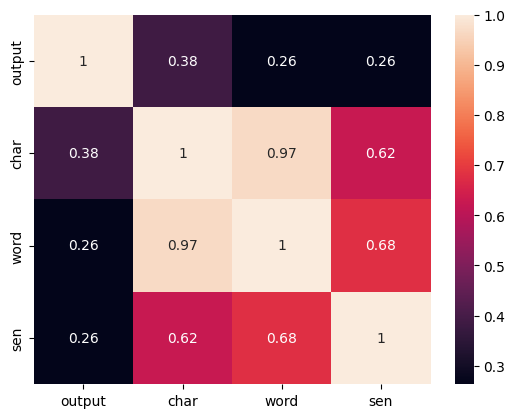

In [36]:
sns.heatmap(num.corr(),annot=True)

Data PreProcessing

Making a function transform that does the following things
lowercase
tokenization
removing special characters
removing stop words and punctuations
stemming

Importing For stopwords

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
from nltk.corpus import stopwords
stop=stopwords.words('english')

Importing for punctuations

In [39]:
import string
punc=string.punctuation

Importing for stemming

In [40]:
from nltk.stem.porter import PorterStemmer

In [41]:
ps=PorterStemmer()

In [42]:
def trans(text):
    #lowercase
    text=text.lower()
    #tokenization
    text=nltk.word_tokenize(text)
    #removing special characters
    y=[]
    for i in text:
        if(i.isalnum()):
            y.append(i)
    text=y[:]
    y=[]
    #removing stop words and punctuation
    for i in text:
        if i not in stop and i not in punc:
            y.append(i)

    text=y[:]
    y=[]
    #for stemming
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

Applying this function on text column

In [43]:
data['transform']=data['text'].apply(trans)

In [44]:
data.head()

,output,text,char,word,sen,transform
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Generating wordcloud on both spam and not spam messages
It will show the words use multiple times in big and other in small

In [45]:
from wordcloud import WordCloud

In [46]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

For spam messages

In [47]:
spam=wc.generate(data[data['output']==1]['transform'].str.cat(sep=" "))

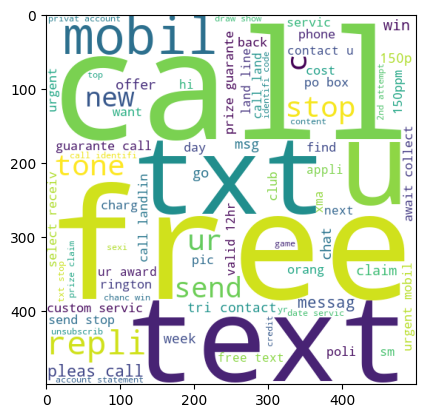

In [48]:
plt.imshow(spam)

For not spam messages

In [49]:
not_spam=wc.generate(data[data['output']==0]['transform'].str.cat(sep=" "))

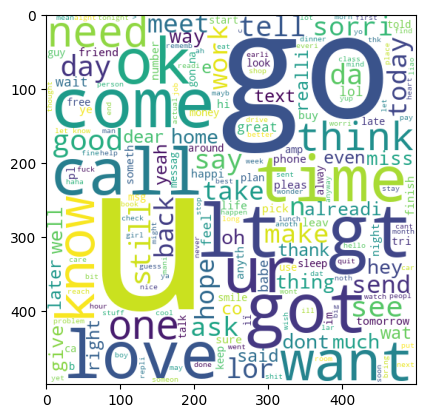

In [50]:
plt.imshow(not_spam)

Extracting top 50 words for both spam and not spam messages

First finding the corpus of the spam messages

In [51]:
spam_corpus=[]
for i in data[data['output']==1]['transform'].tolist():
    for j in i.split():
        spam_corpus.append(j)

Extracting the length of corpurs(all words) in spam messages

In [52]:
len(spam_corpus)

9939

Extracting and Plotting top 50 words from corpus using collections library for spam messages

In [53]:
from collections import Counter

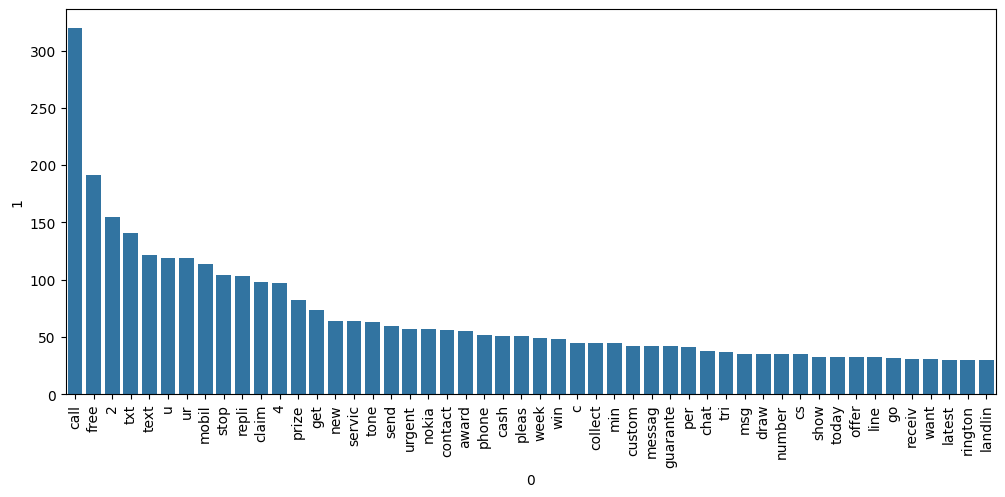

In [54]:
plt.figure(figsize=(12, 5))
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(50))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.show()

First finding the corpus of the not spam messages

In [55]:
not_spam_corpus=[]
for i in data[data['output']==0]['transform'].tolist():
    for j in i.split():
        not_spam_corpus.append(j)

Extracting the length of corpurs(all words) in not spam messages

In [56]:
len(not_spam_corpus)

35404

 Extracting and Plotting for 50 words from corpus using collections library for not spam messages

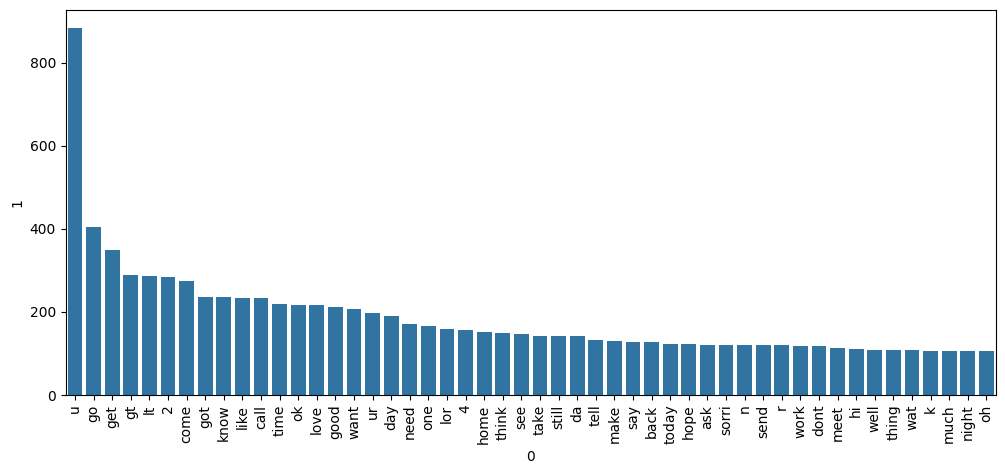

In [57]:
plt.figure(figsize=(12, 5))
sns.barplot(x=pd.DataFrame(Counter(not_spam_corpus).most_common(50))[0],y=pd.DataFrame(Counter(not_spam_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.show()

Model Building

Since on textual data Naive Bayes works better so applying that

Naive Bayes

Since naive bayes takes input data so converting input column text into vectors using bag of words,tfidf

Bag of Words

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
cv=CountVectorizer()

Converting to normal array as output will be sparse array

In [60]:
X_cv=cv.fit_transform(data['transform']).toarray()

In [61]:
X_cv.shape

(5169, 6708)

In [62]:
Y=data['output'].values

In [63]:
Y.shape

(5169,)

Applying train test split

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [66]:
X_train,X_test,Y_train,Y_test=train_test_split(X_cv,Y,test_size=0.2,random_state=2)

In [67]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [68]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

Using Gaussian Naive Bayes and seeing the accuracies as well

In [69]:
gnb.fit(X_train,Y_train)
Y_pred_gnb=gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred_gnb))
print(confusion_matrix(Y_test,Y_pred_gnb))
print(precision_score(Y_test,Y_pred_gnb))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


Using Multinomial Naive Bayes and seeing the accuracies as well

In [70]:
mnb.fit(X_train,Y_train)
Y_pred_mnb=mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred_mnb))
print(confusion_matrix(Y_test,Y_pred_mnb))
print(precision_score(Y_test,Y_pred_mnb))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


Using Bernoulli Naive Bayes and seeing the accuracies as well

In [71]:
bnb.fit(X_train,Y_train)
Y_pred_bnb=bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred_bnb))
print(confusion_matrix(Y_test,Y_pred_bnb))
print(precision_score(Y_test,Y_pred_bnb))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


Among the three Bernoulli is giving the best results

Using Tfidf

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer 

In [73]:
tfidf=TfidfVectorizer()

In [74]:
X_tfidf=tfidf.fit_transform(data['transform']).toarray()

In [75]:
X_tfidf.shape

(5169, 6708)

Applying the same procedure but using X_tfidf

Applying train test split

In [76]:
X_train_tf,X_test_tf,Y_train_tf,Y_test_tf=train_test_split(X_tfidf,Y,test_size=0.2,random_state=2)

Using Gaussian Naive Bayes and seeing the accuracies as well

In [77]:
gnb.fit(X_train_tf,Y_train_tf)
Y_pred_gnb_tf=gnb.predict(X_test_tf)
print(accuracy_score(Y_test_tf,Y_pred_gnb_tf))
print(confusion_matrix(Y_test_tf,Y_pred_gnb_tf))
print(precision_score(Y_test_tf,Y_pred_gnb_tf))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


Using Multinomial Naive Bayes and seeing the accuracies as well

In [78]:
mnb.fit(X_train_tf,Y_train_tf)
Y_pred_mnb_tf=mnb.predict(X_test_tf)
print(accuracy_score(Y_test_tf,Y_pred_mnb_tf))
print(confusion_matrix(Y_test_tf,Y_pred_mnb_tf))
print(precision_score(Y_test_tf,Y_pred_mnb_tf))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


Using Bernoulli Naive Bayes and seeing the accuracies as well

In [79]:
bnb.fit(X_train_tf,Y_train_tf)
Y_pred_bnb_tf=bnb.predict(X_test_tf)
print(accuracy_score(Y_test_tf,Y_pred_bnb_tf))
print(confusion_matrix(Y_test_tf,Y_pred_bnb_tf))
print(precision_score(Y_test_tf,Y_pred_bnb_tf))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


Using tfidf, Multinomial is giving a very high precision score and for imbalance data precision score matters more than accuracy score

So out of all 6 we will use Tfidf and Multinomial Naive Bayes

Applying all algorithms

Importing algorithms

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [81]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [82]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

Function that takes the algorithms as input and gives the accuracy and precision score

In [83]:
def train_classifier(clf,X_train_tf,Y_train_tf,X_test_tf,Y_test_tf):
    clf.fit(X_train_tf,Y_train_tf)
    Y_pred = clf.predict(X_test_tf)
    accuracy = accuracy_score(Y_test_tf,Y_pred)
    precision = precision_score(Y_test_tf,Y_pred)
    
    return accuracy,precision

In [84]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train_tf,Y_train_tf,X_test_tf,Y_test_tf)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

Created a dataframe that contains name, accuracy and presion of all algorithms and sorted it in ascending order of precision

In [85]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [86]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
10,xgb,0.972921,0.943548
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595
3,DT,0.936170,0.846154


The best results are given by K nearest neighbours, Naive bayes and Random Forest
the best is of Random Forest

Improving Performance 

Using Voting Classifier
(using combinations of all the best models)

In [87]:
from sklearn.ensemble import VotingClassifier

Using combination of random forest, k nearest neighbours and naive bayes

In [88]:
voting = VotingClassifier(estimators=[('kn', knc), ('nb', mnb), ('rf', rfc)],voting='soft')

In [89]:
voting.fit(X_train_tf,Y_train_tf)

VotingClassifier(estimators=[('kn', KNeighborsClassifier()),
                             ('nb', MultinomialNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [90]:
Y_pred = voting.predict(X_test_tf)
print("Accuracy",accuracy_score(Y_test_tf,Y_pred))
print("Precision",precision_score(Y_test_tf,Y_pred))

Accuracy 0.9410058027079303
Precision 1.0


The output of voting classifier is good, but more good results are given by previous algorithms like RF

Using Stacking

In [91]:
from sklearn.ensemble import StackingClassifier

In [92]:
estimators=[('kn', knc), ('nb', mnb), ('rf', rfc)]
final_estimator=ExtraTreesClassifier()

In [93]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [94]:
clf.fit(X_train_tf,Y_train_tf)
Y_pred = clf.predict(X_test_tf)
print("Accuracy",accuracy_score(Y_test_tf,Y_pred))
print("Precision",precision_score(Y_test_tf,Y_pred))

Accuracy 0.971953578336557
Precision 0.8978102189781022


Stacking is also not giving good results

The best result is given by Random Forest Classifier